# Activation functions

Activation functions are used to introduce non-linearity into the network.

Without activation functions, the network would be a linear combination of the inputs and we wont be able to learn fetaures with more complex patterns that follow non-linear relationships in nature.

With activation functions, the weighted sum of the inputs is passed through the activation function to produce the output.


## Sigmoid or the Logistic function

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

This functions will squash every input to [0, 1]

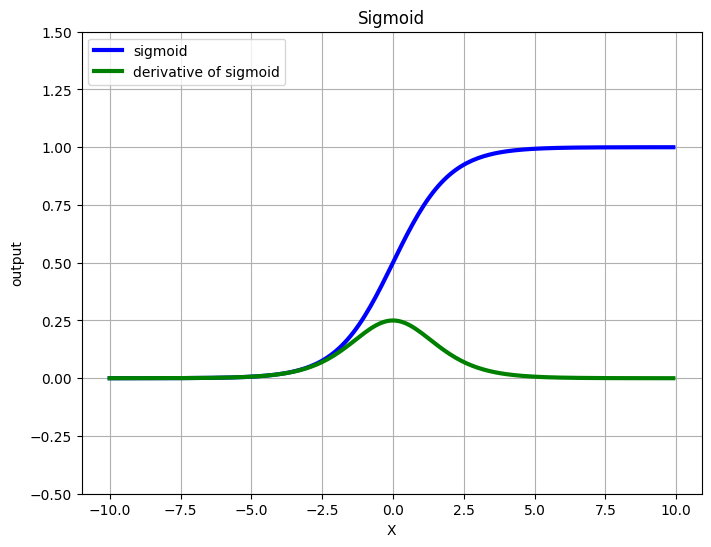

In [2]:
%matplotlib inline
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def grad_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

X = np.arange(-10, 10, 0.1)
fig = plt.figure(figsize=(8, 6))
plt.plot(X, sigmoid(X), label='sigmoid', c='blue', linewidth=3)
plt.plot(X, grad_sigmoid(X), label='derivative of sigmoid', c='green', linewidth=3)
plt.legend(loc='upper left')
plt.xlabel('X')
plt.grid(True)
plt.ylim([-0.5, 1.5])
plt.ylabel('output')
plt.title('Sigmoid')
plt.show()

### Problems with sigmoid:

**1. Vanishing gradient**

In the above figure, where the output is close to 0 and 1, the derivate is nearly zero. Meaning, while backpropagation, the weights are going to update very very slow, nearly negligible, hence, the learning is going to be close to none. So you'll be stuck with the initial weights that you've chosen. 

If you look at the derivative of sigmoid, the maximum value is 0.25. Hence, every gradient will shrink to at least 25% of it's value (worst case, 0) and hence in a deep network the network is, more knowledge is lost. The gradients that are propagated to the shallow layers (layers close to the input layer) will not be as significant to update the weights. 

**2. Not zero-centered**

In the back propagation algorithm:

$$f=\sum w_ix_i+b$$ 
$$\frac{\partial f}{\partial w_i}=x_i$$ 
$$\frac{\partial L}{\partial w_i}=\frac{\partial L} {\partial f}\frac{\partial f}{\partial w_i}=\frac{\partial L}{\partial f}x_i$$

because $x_i>0$, the gradient $\dfrac{dL}{dw_i}$ always has the same sign as $\dfrac{dL}{df}$ (all positive or all negative).

Hence if there's a weight that has to update in positive and another in negative, that will not happen, and will take time to converge


**3. Computationally expensive**

Calculation of sigmoid is computationally expensive

Hence, it is advised to always avoid using Sigmoid


## Hyperbolic Tangent

$$f = tanh(x)$$

Will squash the output to [-1, 1]. This function is nearly same as the sigmoid function, but it is zero centered, hence, is better than sigmoid

Furthermore, tanh is just a scaled version of sigmoid, so following holds:
$$tanh(x) = 2\sigma(2x) - 1$$

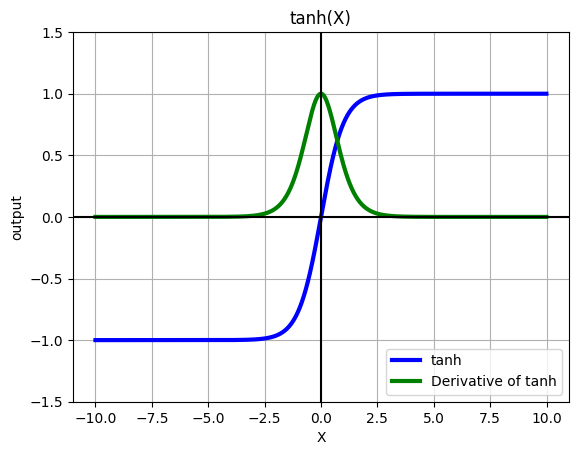

In [3]:
def grad_tanh(x):
    return 1 - np.tanh(x)**2

X = np.arange(-10, 10, 0.01)
fig, ax = plt.subplots()
ax.plot(X, np.tanh(X), label='tanh',  c='blue', linewidth=3)
ax.plot(X, grad_tanh(X), label='Derivative of tanh', c='green', linewidth=3)
plt.grid(True)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.legend(loc='lower right')
plt.xlabel('X')
plt.ylim([-1.5, 1.5])
plt.ylabel('output')
plt.title('tanh(X)')
plt.show()

## Rectified Linear Unit (ReLU)

$$f(x) = max(0, x)$$

ReLU is recommended by Hinton et. al. and it is one of the most used activation functions that has many advantages:

**1. Solves vanishing gradient problem**

ReLU doesn't suffer from vanishing gradient problem since the slopes are arbitrary with respect to inputs

**2. Computationally cheap & simple to implement**

ReLU doesn't involve any mathematical operations and just replaces x < 0 with 0. 

**Problem with ReLU**

**Dying ReLU problem**
Due to the nature of ReLU, if a large gradient propagates to the input, then the Network may reach a state where the bias are very low (negative) and hence the output of ReLU will be 0 no matter what the input. And since the gradient of 0 is 0, the network won't recover from this state and will stay the same forever. 


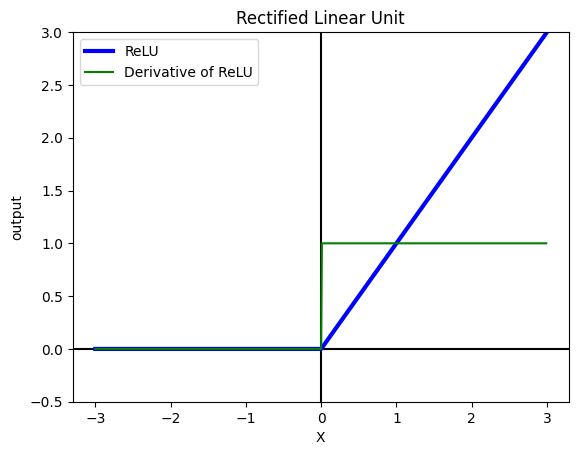

In [4]:
def relu(x):
    return np.array([max(0, i) for i in x]) 

def grad_relu(x):
    return np.array([1 if i > 0 else 0 for i in x])

X = np.arange(-3, 3, 0.01)
fig, ax = plt.subplots()
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.plot(X, relu(X), label='ReLU',  c='blue', linewidth=3)
ax.plot(X, grad_relu(X), label='Derivative of ReLU', c='green')
plt.legend(loc = 'upper left')
plt.xlabel('X')
plt.ylim([-0.5, 3])
plt.ylabel('output')
plt.title('Rectified Linear Unit')
plt.show()

## Leaky ReLU

$$f_r(x) = max(\alpha x, x)$$


Leaky ReLU aims to solve the Dying ReLU problem by adding a small value alpha to the negative values. Therefore, the gradient on the negative values will be alpa and the network will be able to recover.

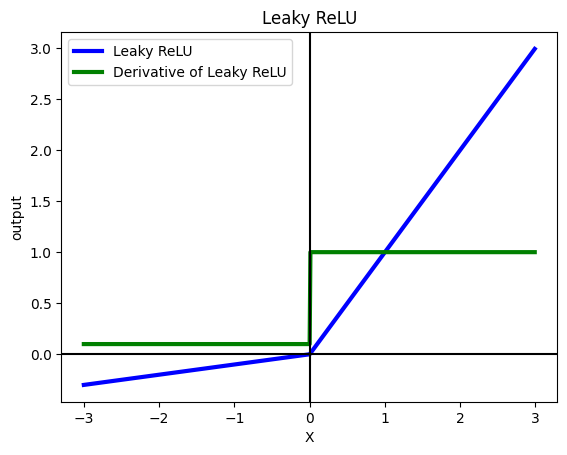

In [5]:
# consider alpha = 0.1
def leaky_relu(x):
    return np.array([max(0.1*i, i) for i in x]) 

def grad_leaky_relu(x):
    return np.array([1 if i > 0 else 0.1 for i in x])

X = np.arange(-3, 3, 0.01)
fig, ax = plt.subplots()
ax.plot(X, leaky_relu(X), label='Leaky ReLU',  c='blue', linewidth=3)
ax.plot(X, grad_leaky_relu(X), label='Derivative of Leaky ReLU', c='green', linewidth=3)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.legend(loc = 'upper left')
plt.xlabel('X')
plt.ylabel('output')
plt.title('Leaky ReLU')
plt.show()